<a href="https://colab.research.google.com/github/sarahsouzaa/Economia/blob/main/economia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [243]:
#ajuste de casas decimais
pd.options.display.float_format = "{:,.2f}".format

In [244]:
#layout do seaborn
sns.set_theme(style = "whitegrid")

In [245]:
#leitura de dados
BaseCredito = pd.read_csv("Base_Dados - Operacoes Uniao.csv", encoding = "latin1", sep = ";")
BaseCredito.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300.000,00",00000.000000/0021-94,"3,100,104.00",Devolvido,19/08/2009,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172.700,00",17944.000104/2008-22,"3,100,104.00",Arquivado,17/04/2008,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300.000,00",17944.000953/2009-67,"3,100,104.00",Deferido,20/11/2009,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187.200,00",17944.001037/2009-44,"3,100,104.00",Deferido,20/11/2009,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1.000.000,00",17944.001324/2013-31,"3,100,104.00",Deferido,06/11/2013,STN


In [246]:
BaseCredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25891 entries, 0 to 25890
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Interessado             25891 non-null  object 
 1   UF                      25891 non-null  object 
 2   Tipo de interessado     25891 non-null  object 
 3   Tipo de operação        25891 non-null  object 
 4   Finalidade              25891 non-null  object 
 5   Tipo de credor          25891 non-null  object 
 6   Credor                  25891 non-null  object 
 7   Moeda                   25891 non-null  object 
 8   Valor                   25891 non-null  object 
 9   Número do Processo/PVL  25891 non-null  object 
 10  Código IBGE             25876 non-null  float64
 11  Status                  25891 non-null  object 
 12  Data                    25891 non-null  object 
 13  Analisado por           25891 non-null  object 
dtypes: float64(1), object(13)
memory usage

In [247]:
#tratamento dos dados - ponto e vírgula
BaseCredito.Valor = BaseCredito.Valor.apply(lambda Loop : Loop.replace(".", ""))
BaseCredito.Valor = BaseCredito.Valor.apply(lambda Loop : Loop.replace(",", "."))
BaseCredito.Valor = pd.to_numeric(BaseCredito.Valor)
BaseCredito.Valor.head()

0     300,000.00
1     172,700.00
2     300,000.00
3     187,200.00
4   1,000,000.00
Name: Valor, dtype: float64

In [248]:
#tratamento dos dados - data
BaseCredito.Data = pd.to_datetime(BaseCredito.Data)

BaseCredito.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN


In [249]:
BaseCredito.nunique()

Interessado                3948
UF                           27
Tipo de interessado           3
Tipo de operação              6
Finalidade                   82
Tipo de credor                7
Credor                      137
Moeda                         5
Valor                      7479
Número do Processo/PVL    25891
Código IBGE                4079
Status                       28
Data                       4096
Analisado por                 2
dtype: int64

In [250]:
#adicionando coluna de região
RegiaoUF = {'AC' : 'Norte', 'AM' : 'Norte', 'AP' : 'Norte', 'RO' : 'Norte', 'RR' : 'Norte', 'TO' : 'Norte', 'PA' : 'Norte', 'PB' : 'Nordeste', 'PE' : 'Nordeste', 'RN' : 'Nordeste', 'SE' : 'Nordeste', 'AL' : 'Nordeste', 'BA' : 'Nordeste', 'CE' : 'Nordeste','PI' : 'Nordeste', 'MA' : 'Nordeste', 'DF' : 'Centro-Oeste', 'GO' : 'Centro-Oeste', 'MS' : 'Centro-Oeste', 'MT' : 'Centro-Oeste', 'PR' : 'Sul', 'RS' : 'Sul', 'SC' : 'Sul','MG' : 'Sudeste', 'SP' : 'Sudeste', 'ES' : 'Sudeste', 'RJ' : 'Sudeste' }
BaseCredito["Região"] = BaseCredito.UF.map(RegiaoUF)
BaseCredito.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por,Região
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN,Sudeste
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN,Sudeste
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN,Sudeste


In [251]:
#gerando datas
BaseCredito["Ano"] = BaseCredito.Data.dt.year
BaseCredito["Mês"] = BaseCredito.Data.dt.month
BaseCredito["Dia"] = BaseCredito.Data.dt.day
BaseCredito.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por,Região,Ano,Mês,Dia
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN,Sudeste,2009,8,19
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN,Sudeste,2008,4,17
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste,2009,11,20
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste,2009,11,20
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN,Sudeste,2013,11,6


In [252]:
BaseCredito.describe(include = "all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Interessado,25891,3948,São Paulo,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF,25891,27,MG,4954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de interessado,25891,3,Município,24697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de operação,25891,6,Operação Contratual Interna,24168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Finalidade,25891,82,Infraestrutura,9871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de credor,25891,7,Instituição Financeira Nacional,23998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credor,25891,137,Caixa Econômica Federal,6904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Moeda,25891,5,Real,25226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor,"25,891.00",NaN,NaN,NaN,"47,485,866.33",0.00,"503,879.00","1,470,441.00","5,000,000.00","223,539,966,235.09","1,696,002,998.11"
Número do Processo/PVL,25891,25891,00000.000000/0021-94,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
#análise descritiva - concentração de cidades(%):
BaseCredito.Interessado.value_counts(normalize = True).cumsum()

Interessado
São Paulo                0.00
Rio de Janeiro           0.01
Ceará                    0.01
Bahia                    0.02
Belo Horizonte           0.02
                         ... 
Barra de São Miguel      1.00
Passabém                 1.00
Barra de Santo Antônio   1.00
São Braz do Piauí        1.00
Crisópolis               1.00
Name: proportion, Length: 3948, dtype: float64

In [254]:
#concentração por UF:
BaseCredito.UF.value_counts(normalize = True)

UF
MG   0.19
PR   0.18
RS   0.15
SP   0.13
SC   0.12
BA   0.05
GO   0.02
CE   0.02
MT   0.02
RJ   0.01
PE   0.01
MS   0.01
ES   0.01
PI   0.01
TO   0.01
PA   0.01
RO   0.01
MA   0.01
RN   0.01
PB   0.01
SE   0.01
AL   0.00
AM   0.00
AC   0.00
DF   0.00
RR   0.00
AP   0.00
Name: proportion, dtype: float64

In [255]:
#concentração por região:
BaseCredito.Região.value_counts(normalize = True)

Região
Sul            0.45
Sudeste        0.35
Nordeste       0.12
Centro-Oeste   0.06
Norte          0.03
Name: proportion, dtype: float64

In [256]:
#finalidade dos empréstimos:
pd.DataFrame(BaseCredito.Finalidade.value_counts(normalize = True).cumsum()).head(10)

,proportion
Finalidade,
Infraestrutura,0.38
"Aquisição de máquinas, equipamentos e veículos",0.52
Provias,0.57
PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias,0.61
"Aquisição de terrenos, imóveis e/ou construção de instalações",0.64
PMAT,0.67
Caminho da Escola 2,0.69
Saneamento básico,0.72
Multissetorial,0.74


In [257]:
BaseCredito.Credor.value_counts(normalize = True).cumsum().head(10)

Credor
Caixa Econômica Federal                                0.27
Banco do Brasil S/A                                    0.45
Agência de Fomento do Paraná S/A                       0.58
Banco de Desenvolvimento de Minas Gerais S/A           0.71
Agência de Fomento do Estado de Santa Catarina S/A     0.76
BADESUL Desenvolvimento S.A. - Agência de Fomento/RS   0.81
Agência de Fomento do Estado de São Paulo              0.84
Banco Nacional de Desenvolvimento Econômico e Social   0.86
Banco Regional de Desenvolvimento do Extremo Sul       0.88
Agência de Fomento do Estado da Bahia S/A              0.90
Name: proportion, dtype: float64

In [258]:
BaseCredito.Status.value_counts(normalize = True).cumsum()

Status
Deferido                                                0.49
Deferido (PVL-IF)                                       0.70
Arquivado                                               0.77
Devolvido                                               0.84
Arquivado por decurso de prazo                          0.89
Encaminhado à PGFN com manifestação técnica favorável   0.93
Regularizado                                            0.96
Arquivado a pedido                                      0.97
Em retificação pelo interessado                         0.98
Em análise                                              0.98
Indeferido                                              0.99
Arquivado por decurso de prazo (PVL-IF)                 0.99
Arquivado a pedido (PVL-IF)                             0.99
Em retificação pelo interessado (PVL-IF)                0.99
Em retificação pelo credor                              0.99
Em retificação pelo credor (PVL-IF)                     0.99
Encaminhado à PGF

In [259]:
BaseCredito.Ano.value_counts().sort_index()

Ano
2002     549
2003     429
2004     776
2005     202
2006    1041
2007    1388
2008    2097
2009    1013
2010    1834
2011    1330
2012    1251
2013    1627
2014    1377
2015     613
2016     716
2017     786
2018    1228
2019    1780
2020    1026
2021    1232
2022    1383
2023    1590
2024     623
Name: count, dtype: int64

In [260]:
FiltroStatus = ["Deferido", "Deferido (PVL-IF)", "Regularizado"]

BaseConcesao = BaseCredito.loc[BaseCredito.Status.isin(FiltroStatus)]
BaseConcesao.shape

(18809, 18)

In [261]:
Analise = BaseConcesao[(BaseConcesao["Tipo de interessado"] == 'Estado') & (BaseConcesao.Ano >= 2014)].groupby(by = ["Região", "Interessado"] ).agg(
    Quantidade = ("Interessado", "count"),
    TotalLiberado = ("Valor", "sum"),
    TicketMedio = ("Valor", "median")
).reset_index()

Analise

,Região,Interessado,Quantidade,TotalLiberado,TicketMedio
0,Centro-Oeste,Distrito Federal,9,"1,154,729,593.37","98,109,150.00"
1,Centro-Oeste,Goiás,2,"2,405,856,000.00","1,202,928,000.00"
2,Centro-Oeste,Mato Grosso,4,"2,445,747,484.88","216,000,000.00"
3,Centro-Oeste,Mato Grosso do Sul,2,"5,798,237,149.08","2,899,118,574.54"
4,Nordeste,Alagoas,2,"550,741,606.20","275,370,803.10"
5,Nordeste,Bahia,5,"1,809,000,000.00","250,000,000.00"
6,Nordeste,Ceará,4,"889,010,499.80","123,816,137.08"
7,Nordeste,Maranhão,1,"55,225,235.44","55,225,235.44"
8,Nordeste,Paraíba,1,"300,000,000.00","300,000,000.00"
9,Nordeste,Pernambuco,6,"3,702,835,371.45","151,000,000.00"


In [262]:
#base de dados tratada
BaseConcesao.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por,Região,Ano,Mês,Dia
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste,2009,11,20
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste,2009,11,20
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN,Sudeste,2013,11,6
5,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"700,000.00",PVL02.007525/2019-74,"3,100,104.00",Deferido (PVL-IF),2019-11-20,Instituição Financeira,Sudeste,2019,11,20
6,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"2,000,000.00",PVL02.007207/2022-17,"3,100,104.00",Deferido (PVL-IF),2022-09-22,Instituição Financeira,Sudeste,2022,9,22


Montagem de Gráficos

Text(0.0, 1.2, 'Ministério da Fazenda - Paleta de Cores')

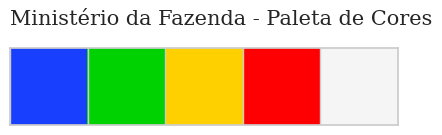

In [263]:
sns.set_theme(style = "whitegrid")

#paleta de cores

Paleta = ["#183FFE", "#00D100", "#FFD000", "#FE0002", "#f5f5f5"]
sns.palplot(Paleta)
plt.title("Ministério da Fazenda - Paleta de Cores", loc = "left", fontfamily = "serif", fontsize = 15, y = 1.2)

In [264]:
AnaliseEmprestimo = BaseConcesao.groupby(by = "Ano").agg(Sum = ("Valor", "sum")).tail(8) / 10 ** 9
AnaliseEmprestimo

,Sum
Ano,
2017,251.32
2018,19.60
2019,13.25
2020,77.14
2021,9.06
2022,14.55
2023,17.74
2024,4.22


<BarContainer object of 8 artists>

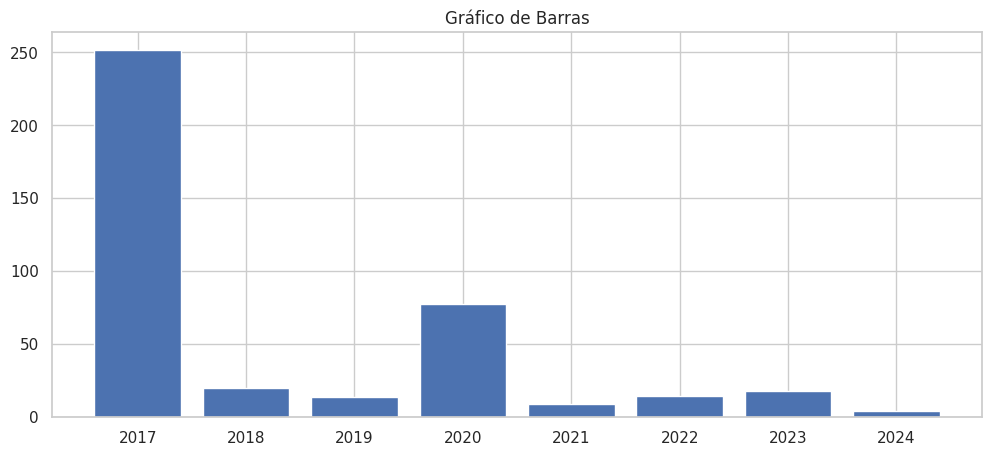

In [265]:
plt.figure(figsize = (12, 5))
plt.title("Gráfico de Barras")
plt.bar(AnaliseEmprestimo.index, AnaliseEmprestimo.Sum)

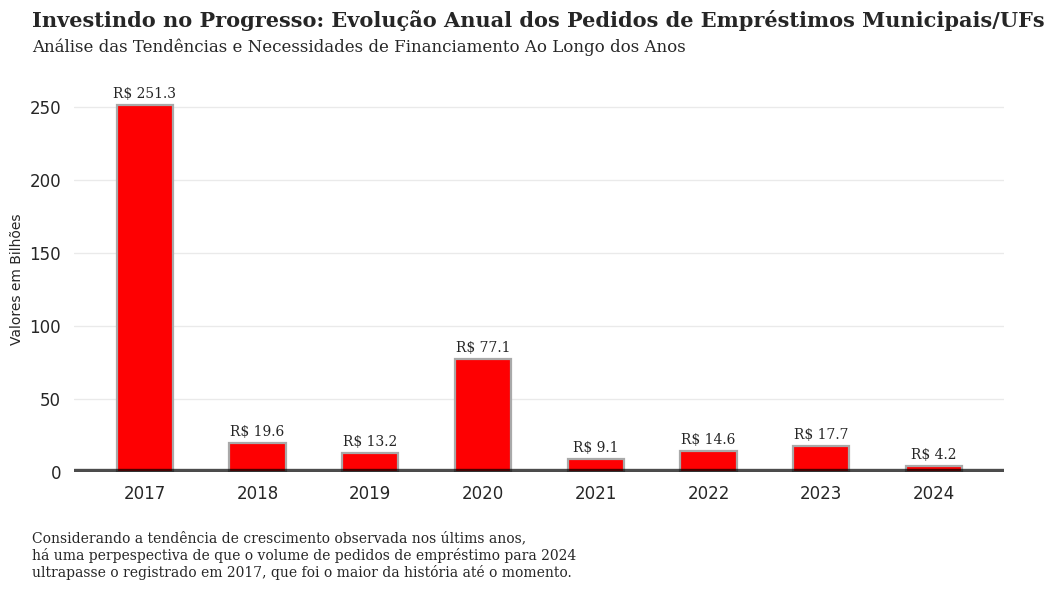

In [266]:
fig, ax = plt.subplots(figsize = (12, 5))
fig.text(0.09, 1, "Investindo no Progresso: Evolução Anual dos Pedidos de Empréstimos Municipais/UFs", fontsize = 15, fontweight = "bold", fontfamily = "serif")
fig.text(0.09, 0.95, "Análise das Tendências e Necessidades de Financiamento Ao Longo dos Anos", fontsize = 12, fontweight = "light", fontfamily = "serif")
bars = ax.bar(AnaliseEmprestimo.index, AnaliseEmprestimo.Sum, width = 0.5, edgecolor = "darkgray", linewidth = 1.6, color = Paleta[3])

ax.axhline(y = 0, color = "black", linewidth = 5.3, alpha = 0.7)
ax.grid(axis = "y", linestyle = "-", alpha = 0.4)
ax.grid(axis = "x", alpha = 0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_ylabel("Valores em Bilhões", size = 10)

ax.tick_params(axis = "both", which = "major", labelsize = 12)

#adição de valores
for bar in bars:
  height = bar.get_height()
  ax.annotate("R$ {:,.1f}".format(height),
              #centralização
              xy = (bar.get_x() + bar.get_width() / 2, height),
              xytext = (0, 3), textcoords = "offset points", ha = "center", va = "bottom",
              #fontes de texto
              fontsize = 10, fontweight = "light", fontfamily = "serif")


#insights
fig.text(0.09, -0.1, '''Considerando a tendência de crescimento observada nos últims anos,
há uma perpespectiva de que o volume de pedidos de empréstimo para 2024
ultrapasse o registrado em 2017, que foi o maior da história até o momento.''', fontsize = 10, fontweight = "light", fontfamily = "serif")

In [267]:
AnaliseMoedaUF = BaseCredito.groupby(by = ["Região", "Moeda"]).agg(Valor = ("Valor", "sum")).reset_index()
Coluna = pd.DataFrame()
for Loop in AnaliseMoedaUF.Região.unique():
  Total = AnaliseMoedaUF[AnaliseMoedaUF.Região == Loop].Valor.sum()
  Fracao = AnaliseMoedaUF[AnaliseMoedaUF.Região == Loop].Valor/Total
  Coluna = pd.concat([Coluna, Fracao.reset_index()])

AnaliseMoedaUF["%"] = Coluna.Valor.values
AnaliseMoedaUF.head()

,Região,Moeda,Valor,%
0,Centro-Oeste,Dólar dos EUA,"5,194,722,117.27",0.07
1,Centro-Oeste,Euro,"184,000,000.00",0.00
2,Centro-Oeste,Iene,"1,439,500,000.00",0.02
3,Centro-Oeste,Real,"70,365,830,267.57",0.91
4,Nordeste,Direito Especial - SDR,"66,656,104.00",0.00


In [268]:
TabCruzada = AnaliseMoedaUF.pivot_table(index = "Região", columns = "Moeda", values = "%")
TabCruzada.drop(columns = "Direito Especial - SDR", inplace = True)
TabCruzada.columns = ["Dólar", "Euro", "Iene", "Real"]
TabCruzada.head()

,Dólar,Euro,Iene,Real
Região,,,,
Centro-Oeste,0.07,0.00,0.02,0.91
Nordeste,0.08,0.00,0.37,0.54
Norte,0.07,0.00,0.18,0.75
Sudeste,0.05,0.00,0.18,0.77
Sul,0.05,0.00,0.15,0.80


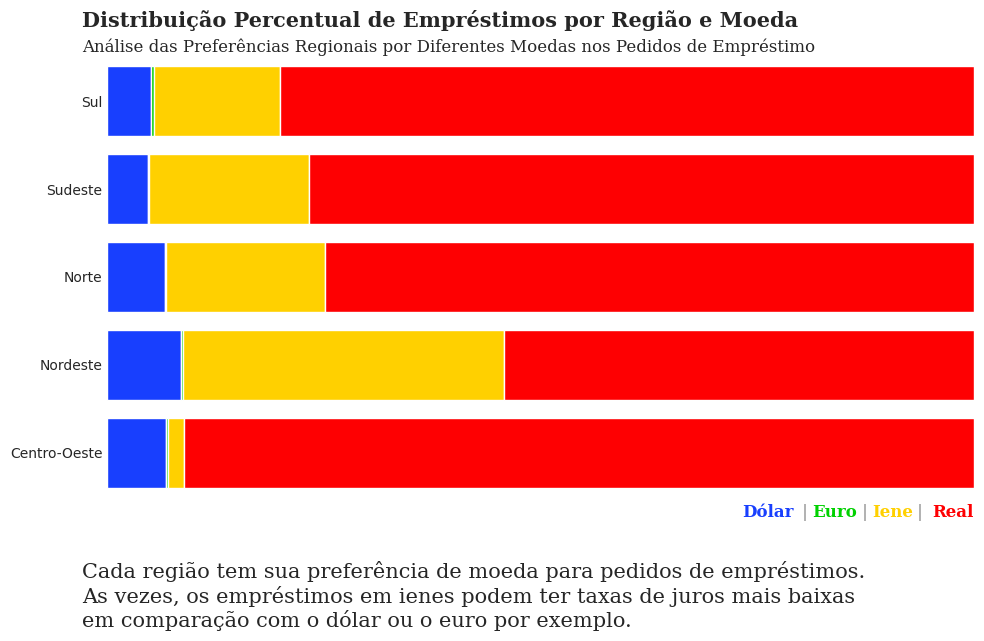

In [269]:
fig, ax = plt.subplots(figsize = (10, 5))
bottom = np.zeros(len(TabCruzada))
for i, column in enumerate(TabCruzada.columns):
  ax.barh(TabCruzada.index, TabCruzada[column], left = bottom, color = Paleta[i], label = column, height = 0.8)
  bottom += TabCruzada[column].fillna(0)

for Loop in ["top", "left", "right", "bottom"]:
  ax.spines[Loop].set_visible(False)

fig.text(0.09, 1, "Distribuição Percentual de Empréstimos por Região e Moeda", fontsize = 15, fontweight = "bold", fontfamily = "serif")
fig.text(0.09, 0.95, "Análise das Preferências Regionais por Diferentes Moedas nos Pedidos de Empréstimo", fontsize = 12, fontweight = "light", fontfamily = "serif")

ax.grid(axis = "y", alpha = 0)
ax.grid(axis = "x", alpha = 0)

ax.set_xlim(0, 1)
ax.set_xticks([])

ax.tick_params(axis = "both", which = "major", labelsize = 10)
ax.tick_params(axis = u"both", which = u"both", length = 0)

#legenda das moedas
fig.text(0.75, 0.02, "Dólar", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = Paleta[0])
fig.text(0.81, 0.02, "|", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = "darkgray")
fig.text(0.82, 0.02, "Euro", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = Paleta[1])
fig.text(0.87, 0.02, "|", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = "darkgray")
fig.text(0.88, 0.02, "Iene", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = Paleta[2])
fig.text(0.925, 0.02, "|", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = "darkgray")
fig.text(0.94, 0.02, "Real", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = Paleta[3])

plt.tight_layout()

#insights
fig.text( 0.09, -0.2, '''Cada região tem sua preferência de moeda para pedidos de empréstimos.
As vezes, os empréstimos em ienes podem ter taxas de juros mais baixas
em comparação com o dólar ou o euro por exemplo.''', fontsize = 15, fontweight = "light", fontfamily = "serif")

In [270]:
AnaliseFinalidades = BaseCredito[BaseCredito.Ano>=2017].Finalidade.value_counts(normalize=True).head(10)
for Loop in AnaliseFinalidades.index:
  print(Loop)

Infraestrutura
Aquisição de máquinas, equipamentos e veículos
Multissetorial
Aquisição de terrenos, imóveis e/ou construção de instalações
Pró-Transporte
Aporte de capital
Saneamento básico
Desenvolvimento sustentável
PMAT
PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias


In [271]:
AnaliseFinalidades.index = ["Infraestrutura", "Aquisição Equipamentos", "Multissetorial", "Aquisição de Terrenos",
"Pró-Transporte", "Aporte de Capital", "Saneamento Básico", "Desenvolvimento Sustentável", "PMAT", "PAC 2"]

AnaliseFinalidades.sort_values(inplace = True)

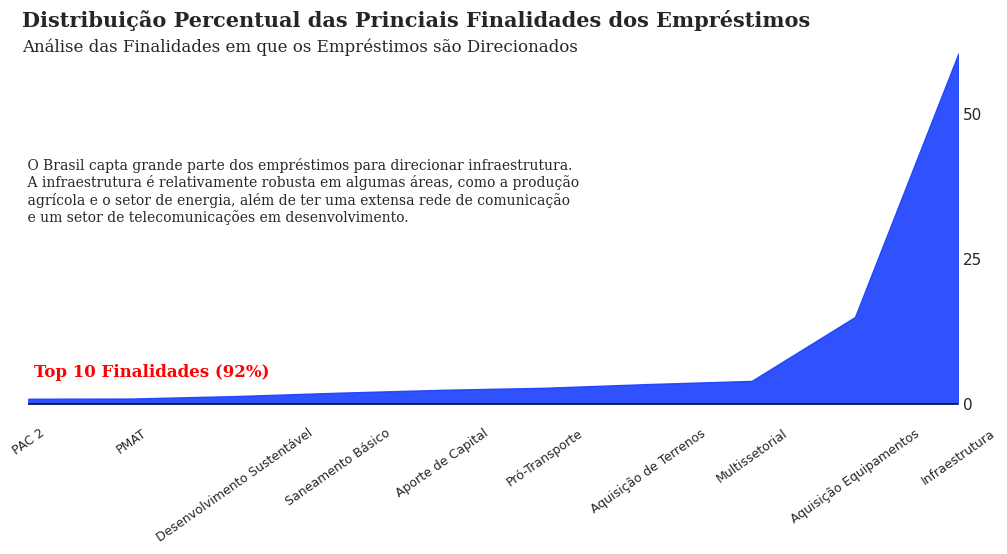

In [272]:
fig, ax = plt.subplots(figsize = (12, 5))

fig.text(0.12, 0.90, 'Distribuição Percentual das Princiais Finalidades dos Empréstimos', fontsize = 15, fontweight = "bold", fontfamily = "serif")
fig.text(0.12, 0.85, 'Análise das Finalidades em que os Empréstimos são Direcionados', fontsize = 12, fontweight = "light", fontfamily = "serif")

ax.fill_between(AnaliseFinalidades.index, 0, AnaliseFinalidades * 100, color = Paleta[0], alpha = 0.9)
ax.axhline(y = 0, color = "black", linewidth = 1.3, alpha = .7)

for s in ["top", "right", "bottom", "left"]:
    ax.spines[s].set_visible(False)

fig.text(0.13, 0.2, "Top 10 Finalidades (92%)", fontweight = "bold", fontfamily = "serif", fontsize = 12, color = Paleta[3])

ax.yaxis.tick_right()

ax.grid(False)
ax.set_xlim([0, 9])
plt.xticks(rotation = 35, fontsize = 9)
plt.yticks(np.arange(0, 70, 25))

ax.tick_params(axis = u"both", which = u"both", length = 0)

#insights
fig.text(0.11, 0.51, '''    O Brasil capta grande parte dos empréstimos para direcionar infraestrutura.
    A infraestrutura é relativamente robusta em algumas áreas, como a produção
    agrícola e o setor de energia, além de ter uma extensa rede de comunicação
    e um setor de telecomunicações em desenvolvimento.''',
    fontsize=10, fontweight = "light", fontfamily = "serif")

In [273]:
#selecionar finalidades
ListaFinalidade = list(BaseCredito.Finalidade.value_counts(normalize = True).cumsum().head(10).index.values)

AnaliseRegiaoFinalidade = BaseCredito.loc[BaseCredito.Finalidade.isin(ListaFinalidade)].groupby(by = ["Região", "Finalidade"]).agg(Sum = ("Valor", "sum")).reset_index().pivot_table(index = "Região", columns = "Finalidade", values = "Sum")

AnaliseRegiaoFinalidade

Finalidade,"Aquisição de máquinas, equipamentos e veículos","Aquisição de terrenos, imóveis e/ou construção de instalações",Caminho da Escola,Caminho da Escola 2,Infraestrutura,Multissetorial,PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias,PMAT,Provias,Saneamento básico
Região,,,,,,,,,,
Centro-Oeste,"2,100,032,663.02","53,717,532.40","35,017,950.00","22,647,600.00","21,563,103,570.45","615,406,138.00","2,717,872,117.30","176,218,631.10","110,320,116.93","395,268,821.28"
Nordeste,"586,878,563.23","342,094,063.82","57,952,907.01","71,670,045.00","54,059,177,086.49","10,718,789,393.25","1,794,088,385.71","478,380,713.71","120,821,143.01","3,601,116,507.58"
Norte,"91,733,777.20","18,582,263.45","22,959,214.00","13,327,142.00","43,313,656,121.66","3,582,002,278.00","1,387,051,493.12","256,845,325.70","53,886,920.00","1,927,488,987.99"
Sudeste,"10,305,807,290.86","1,010,800,242.38","98,043,985.57","74,229,235.00","144,255,809,504.75","12,193,746,851.38","5,885,148,985.49","2,445,433,222.88","561,807,562.51","3,582,864,990.31"
Sul,"1,888,482,882.44","749,665,469.17","112,844,135.00","55,028,931.00","40,598,761,640.83","4,692,682,726.09","4,475,234,346.23","738,247,290.18","717,284,054.00","933,219,792.66"


In [274]:
AnaliseRegiaoFinalidade.rename(columns = {'Aquisição de máquinas, equipamentos e veículos' : 'Aquisição de Equipamentos', 'Aquisição de terrenos, imóveis e/ou construção de instalações' : 'Aquisição de Imóveis', 'Caminho da Escola' : 'Caminho da Escola', 'Caminho da Escola 2' : 'Caminho da Escola 2', 'Infraestrutura' : 'Infraestrutura', 'Multissetorial' : 'Multissetorial', 'PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias'  : 'PAC 2', 'PMAT' : 'PMAT', 'Provias': 'Provias', 'Saneamento básico': 'Saneamento Básico'}, inplace = True)

AnaliseRegiaoFinalidade

Finalidade,Aquisição de Equipamentos,Aquisição de Imóveis,Caminho da Escola,Caminho da Escola 2,Infraestrutura,Multissetorial,PAC 2,PMAT,Provias,Saneamento Básico
Região,,,,,,,,,,
Centro-Oeste,"2,100,032,663.02","53,717,532.40","35,017,950.00","22,647,600.00","21,563,103,570.45","615,406,138.00","2,717,872,117.30","176,218,631.10","110,320,116.93","395,268,821.28"
Nordeste,"586,878,563.23","342,094,063.82","57,952,907.01","71,670,045.00","54,059,177,086.49","10,718,789,393.25","1,794,088,385.71","478,380,713.71","120,821,143.01","3,601,116,507.58"
Norte,"91,733,777.20","18,582,263.45","22,959,214.00","13,327,142.00","43,313,656,121.66","3,582,002,278.00","1,387,051,493.12","256,845,325.70","53,886,920.00","1,927,488,987.99"
Sudeste,"10,305,807,290.86","1,010,800,242.38","98,043,985.57","74,229,235.00","144,255,809,504.75","12,193,746,851.38","5,885,148,985.49","2,445,433,222.88","561,807,562.51","3,582,864,990.31"
Sul,"1,888,482,882.44","749,665,469.17","112,844,135.00","55,028,931.00","40,598,761,640.83","4,692,682,726.09","4,475,234,346.23","738,247,290.18","717,284,054.00","933,219,792.66"


In [275]:
for Loop in AnaliseRegiaoFinalidade.columns:
  AnaliseRegiaoFinalidade[Loop] = AnaliseRegiaoFinalidade[Loop]/10 ** 9
AnaliseRegiaoFinalidade

Finalidade,Aquisição de Equipamentos,Aquisição de Imóveis,Caminho da Escola,Caminho da Escola 2,Infraestrutura,Multissetorial,PAC 2,PMAT,Provias,Saneamento Básico
Região,,,,,,,,,,
Centro-Oeste,2.10,0.05,0.04,0.02,21.56,0.62,2.72,0.18,0.11,0.40
Nordeste,0.59,0.34,0.06,0.07,54.06,10.72,1.79,0.48,0.12,3.60
Norte,0.09,0.02,0.02,0.01,43.31,3.58,1.39,0.26,0.05,1.93
Sudeste,10.31,1.01,0.10,0.07,144.26,12.19,5.89,2.45,0.56,3.58
Sul,1.89,0.75,0.11,0.06,40.60,4.69,4.48,0.74,0.72,0.93


Text(0.09, 0.1, 'Sudeste se destaca em Infraestrutura e Equipamentos.\nGrande parte de todas as regiões têm similaridades quanto aos pedidos de empréstimos.')

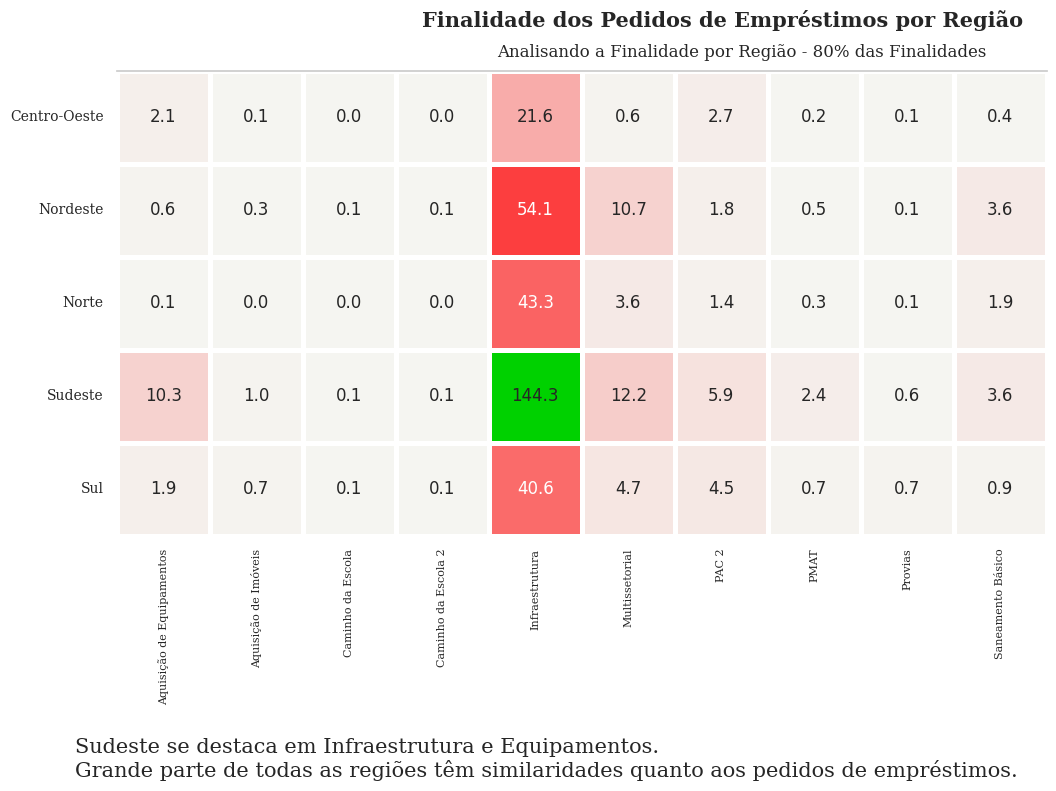

In [276]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#f5f5f1", "#FE0002","#00D100"])

fig, ax = plt.subplots(figsize = (12, 12))

sns.heatmap(AnaliseRegiaoFinalidade, linewidths = 2.5, cmap = cmap, annot = True, fmt = ".1f", square = True, cbar = False, annot_kws = {"fontsize":12})

ax.spines["top"].set_visible(True)

ax.set_ylabel("")
ax.set_xlabel("")

ax.set_yticklabels(ax.get_yticklabels(), fontfamily = "serif", rotation = 0, fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily = "serif", rotation = 90, fontsize = 8)

fig.text(0.88, .725, "Finalidade dos Pedidos de Empréstimos por Região", fontweight = "bold", fontfamily = "serif", fontsize = 15, ha = "right")
fig.text(0.85, 0.7, "Analisando a Finalidade por Região - 80% das Finalidades", ha = "right", fontsize = 12, fontfamily = "serif")

#insights
fig.text(0.09, 0.1,'''Sudeste se destaca em Infraestrutura e Equipamentos.
Grande parte de todas as regiões têm similaridades quanto aos pedidos de empréstimos.''', fontsize = 15, fontweight = "light", fontfamily = "serif")